# Agent-based Model of Social Influence on Obesity Status

## Overview
This project implements an agent based model, based on the work by Hammond and Ornstein **[1]**, that explores the effects of social influence on obesity status (BMI). Agents are connected in a network constructed using the Watts-Strogatz algorithm **[2]**. Every time tick agents consider the mean BMI of their neighbors and move their BMI towards the mean BMI of their neighbors if the mean difference is greater than a “satisficing radius”.

### Files
`WattsStrogatzGraph.py`: Class that implements a graph (or network) of nodes initialized using the Watts–Strogatz algorithm.

`ABMSocialInfluenceBMI.py`: Class that implements the agent based model described above. Utlizes `WattsStrogatzGraph` for agent network.

`Model Visualization and Writeup.ipynb`: Jupyter notebook containing visualizations and a writeup of model results (includes a markdown of this README as well).

### Dependencies
`WattsStrogatzGraph.py` and `ABMSocialInfluenceBMI.py` written using numpy version 1.21.5.

### Examples
**Running a AMB**

    from ABMSocialInfluenceBMI import ABMSocialInfluenceBMI
    import numpy as np

    # Creating a new ABM with a satisficing radius of 0.4
    # and a rewiring probability 0.1
    model = ABMSocialInfluenceBMI(0.4, 0.1)
    # Running model
    final_bmi, intital_bmi, mean_bmi = model.run()
**Creating a graph/network**

    >>> from WattsStrogatzGraph import WattsStrogatzGraph
    # Creating a new network with 150 nodes, 4 neighbors, and
    # a rewiring probability 0.15
    >>> network = WattsStrogatzGraph(150, 4, 0.15)
    # Getting 3rd nodes neighbors (zero indexed)
    >>> network.get_neighbors(2)
    
    
## API Documentation

### `ABMSocialInfluenceBMI`
An agent-based model of social influence on obesity status. Takes a "satisficing radius" (`radius`) and rewiring probability (`rewiring_prob`), all other parameters are optional. BMI defaults to a
$X \sim 15+\text{Gamma}(\alpha = 3, \beta = 0.25)$ distribution, agents defaults to $100$, mean degree defaults to $4$, and ticks defaults to $200$. Model can also be seeded with an optional `seed` argument to create reproducible results.

### `WattsStrogatzGraph`
A graph constructed using the Watts–Strogatz algorithm, used as an underlying network for `ABMSocialInfluenceBMI`. Takes the number of nodes in the network (`n`), the mean degree (`k`), and rewiring probability (`beta`).

## Citations

**[1]** Hammond, R. A., &amp; Ornstein, J. T. (2014). A model of social influence on body mass index. Annals of
the New York Academy of Sciences, 1331(1), 34-42.

**[2]** Watts, D. J.; Strogatz, S. H. (1998). "Collective dynamics of 'small-world' networks" (PDF). Nature. 393 (6684): 440–442.

## Contact
For questions contact: adamsedlak@berkeley.edu

# Visualization Code

In [1]:
from ABMSocialInfluenceBMI import ABMSocialInfluenceBMI
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def run_and_plot_model(radius, rewire_prob, runs=10):
    '''
    Runs and plots a given number of ABMSocialInfluenceBMI
    with the given satisficing radius and rewiring probability.
    
    Parameters
        ----------
        radius : float
            The satisficing radius of the models.
        
        rewire_prob : float (between 0 and 1 inclusive)
            The rewiring probability of the models.
            
        runs : int, optional
            The number of times to run the model, defaults to 10.
            
        Returns
        -------
        None
    '''
    # Create a new figure
    fig, (ax_plot, ax_hist) = plt.subplots(1, 2, figsize=(12, 5))
    fig.tight_layout(pad=3)
    # Figure letters
    ax_plot.set_title('A', loc='left', fontweight = 1000)
    ax_hist.set_title('B', loc='left', fontweight = 1000)
    
    # Add time series x and y labels
    ax_plot.set_xlabel('Ticks')
    ax_plot.set_ylabel('Mean Population BMI')
    ax_plot.set_xlim(0, 210)
    ax_plot.set_ylim(25, 40)
    
    # Add histogram x and y labels
    ax_hist.set_xlabel('BMI')
    ax_hist.set_ylabel('Number of Agents')
    ax_hist.set_xlim(15, 55)
    ax_hist.set_ylim(0, 105)

    # List of linestyles for visualization
    linestyles = ['solid', 'dotted', 'dashed', 'dashdot', (0, (5, 10))]

    # Mean of all model time series
    mean_model = np.zeros(200)
    
    # Run 10 models and plot them
    for i in range(runs):
        # Create a new model and run it
        model = ABMSocialInfluenceBMI(radius, rewire_prob)
        initial_bmi, final_bmi, mean_bmi = model.run()
        
        # Add current results to running average
        mean_model += mean_bmi

        # Plot model i's time series results
        ax_plot.plot(np.arange(200), mean_bmi,
                     linestyle=linestyles[i%5], alpha=0.5)
        
        # Plot a histogram comparing initial and final BMIs of the 1st model
        if i == 0:
            ax_hist.hist([initial_bmi, final_bmi], bins='doane',
                         color=['red', 'blue'], label=['Initial', 'Equilibrium'],
                         alpha=0.5, ec='black')

    # Add model number colorbar
    sm = plt.cm.ScalarMappable(cmap='tab10', norm=colors.Normalize(vmin=1, vmax=10))
    sm.set_array([])
    clb = plt.colorbar(sm, ax=ax_plot, fraction=0.05, pad=0.15,
                location='left', shrink=0.8)
    clb.ax.set_title('Model\nNumber', fontsize=10, pad=12)
    
    # Plot mean of all 10 models
    ax_plot.plot(np.arange(200), mean_model/runs, label='Mean of Models', color='black', lw=3)
    
    # Plot legends
    ax_plot.legend(title=r'$\beta$ = '+str(rewire_prob)+r', $\epsilon$ = '+str(radius),
                   edgecolor='black', fancybox=False, loc='best')
    ax_hist.legend(title='BMI Distributions\n     for Model 1',
                   edgecolor='black', fancybox=False, loc='upper left')
    plt.show()

In [ ]:
%%timeit
model = ABMSocialInfluenceBMI(0.4, 0.1)
initial_bmi, final_bmi, mean_bmi = model.run()

401 ms ± 25.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# Visualization

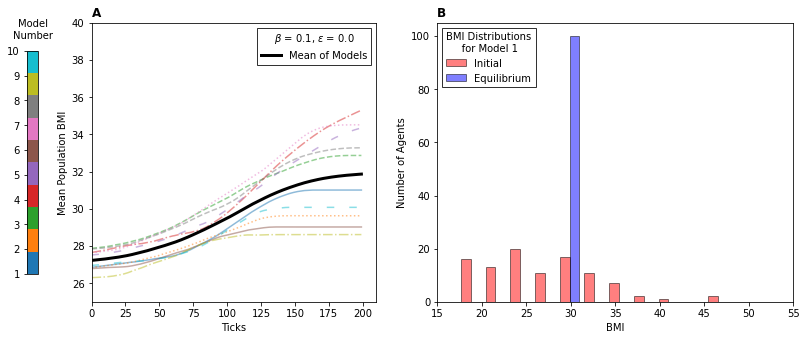

In [2]:
run_and_plot_model(0.0, 0.1)

**Figure 1.** Agent based model results from ten models with a low “rewiring probability”, $\beta=0.1$, and a low “satisficing radius”, $\epsilon=0.0$. The mean population BMI over the course of ten models was plotted, along with the mean of the ten time series (**A**). A histogram of the initial (red) and final (blue) distributions of BMIs in the agent population was also constructed (**B**).

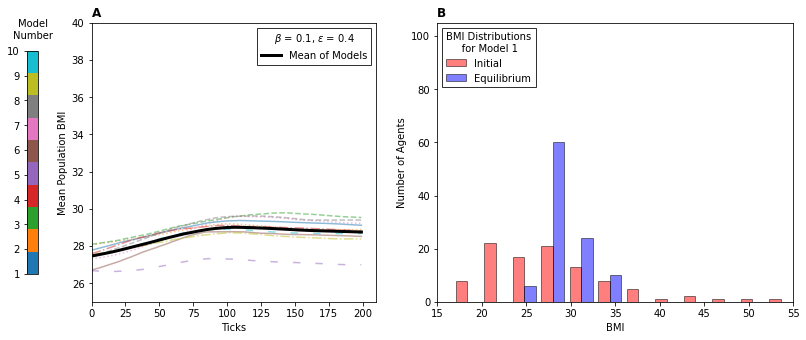

In [3]:
run_and_plot_model(0.4, 0.1)

**Figure 2.** Agent based model results from ten models with a low “rewiring probability”, $\beta=0.1$, and a high “satisficing radius”, $\epsilon=0.4$. The mean population BMI over the course of ten models was plotted, along with the mean of the ten time series (**A**). A histogram of the initial (red) and final (blue) distributions of BMIs in the agent population was also constructed (**B**).

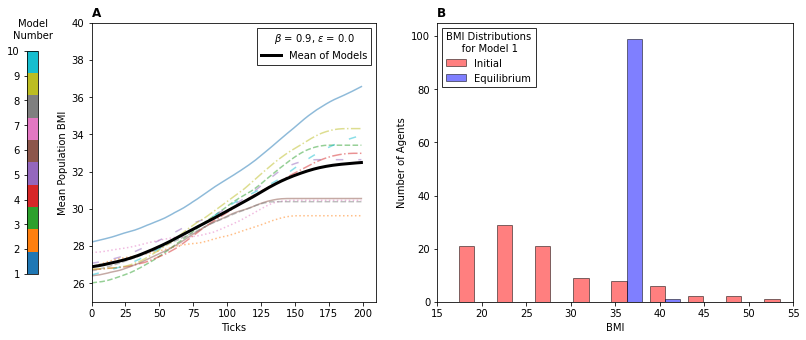

In [4]:
run_and_plot_model(0.0, 0.9)

**Figure 3.** Agent based model results from ten models with a high “rewiring probability”, $\beta=0.9$, and a low “satisficing radius”, $\epsilon=0.0$. The mean population BMI over the course of ten models was plotted, along with the mean of the ten time series (**A**). A histogram of the initial (red) and final (blue) distributions of BMIs in the agent population was also constructed (**B**).

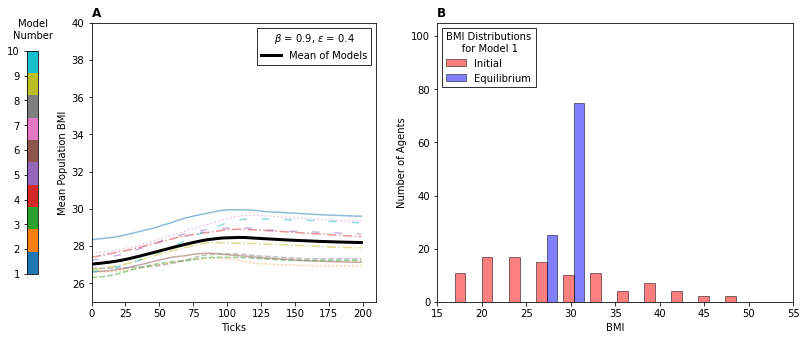

In [5]:
run_and_plot_model(0.4, 0.9)

**Figure 4.** Agent based model results from ten models with a high “rewiring probability”, $\beta=0.9$, and a high “satisficing radius”, $\epsilon=0.4$. The mean population BMI over the course of ten models was plotted, along with the mean of the ten time series (**A**). A histogram of the initial (red) and final (blue) distributions of BMIs in the agent population was also constructed (**B**).

# Writeup

   Across all four model conditions, the distribution of population body mass index (BMI) decreased in variance and the mean population BMI increased (**Figure 1–4**). Considering that individual agents move their BMI toward the mean of a population subset, it is reasonable that the population BMI variance decreases because every network is moving towards a central value. Individual networks are in turn influenced by the networks of their neighbors, which has a population level effect of agent BMI moving toward the mean of the population. The initial BMI distribution, $X \sim 15+\text{Gamma}(\alpha = 3, \beta = 0.25)$, is right skewed, meaning initially the majority of the agents were below the population mean. This helps explain the observed mean population BMI increase, to some extent across all models, because the majority of agents were increasing their BMI to move towards the population mean.
   
   The “satisficing radius” parameter ($\epsilon$) appeared to have the largest impact on model results with larger values dampening the model effects, i.e., mean population BMI increasing and variance decreasing. Regardless of the rewiring probability, models with a satisficing radius of $0.0$ resulted in a greater mean population BMI that was approximately $3$ to $4$ points higher than models with a satisficing radius of $0.4$. This aligns with model intuition, that when agents are more sensitive to the BMI of their peers, model behavior is more dynamic. The rewiring probability parameter ($\beta$) appeared to have little impact on model behavior; however, it is possible that greater values of $\beta$ increased model variance (**Figure 2 & 4**). 
